# 기초 통계
- 통계 유형
- 랜덤 넘버
- 정규 분포
- 가설 검정 (t-검정)
- 독립성 검정 (chi 제곱 검정)
- 통계분석과 머신러닝의 차이

## 통계 유형
- 기술(descriptive) 통계
 - 데이터의 평균, 중위값, 표준편차, 확률 분포 등으로 데이터의 특징을 설명한다. 
 - 두 개 이상 변수에 대해서는 상관관계 등을 보고 관련성을 파악한다.
- 추정(estimation)
 - 샘플(표본) 데이터를 보고 모집단(전체 데이터)의 특성 (평균, 표준편차 등)을 추정하는 것
 - 평균, 표준편차 등 특정 수치 값을 추정하는 점추정과, 신뢰구간을 추청하는 구간 추정이 있다
- 가설 검정 (testing hypothesis)
 - 샘플 데이터를 보고, 주장하고자 하는 대립가설(alternative hypothesis)이 맞는지를 검정(testing)하는 것
 - 대립가설이 맞지 않다는 영(null) 가설이 얼마나 확률적으로 발생 가능한지를 보고 발생확률이 매우 낮으면 영가설이 기각하고 대립가설을 채택한다
 - 검정은 수학적인 증명(proof)은 아니며 의사결정을 위한 근거를 제시하는 것이다.

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.48.19.png?raw=1" width=250 align='left'>

# 랜덤 넘버
- 데이터 분석에는 랜덤 넘버를 자주 사용한다
- 랜덤 넘버를 사용하는 이유는 불확실한 모든 가능한 경우를 실험적으로 커버할 수 있기 때문이다

## import

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## rand()

In [419]:
# 0~1 사이의 랜덤 넘버 얻기 (rand 함수 사용)
# 아래는 N개의 랜덤 넘버를 만들고 이를 1차원 어레이 (벡터)로 얻는다
N = 20
x = np.random.rand(N)
x

array([0.80750187, 0.18102392, 0.95109422, 0.36853509, 0.79442637,
       0.40248097, 0.42068174, 0.27307292, 0.68056639, 0.00703618,
       0.51059904, 0.14473952, 0.10697665, 0.4431411 , 0.15026004,
       0.54619389, 0.68800765, 0.63080313, 0.85384372, 0.47940064])

In [420]:
x < 0.5

array([False,  True, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False,  True])

In [421]:
# True 갯수 
(x < 0.5).sum()

11

In [422]:
# 평균 구하기
(x < 0.5).mean()

0.55

## 랜덤 넘버를 이용한 파이 구하기
- $\pi$ 구하기
- 컴퓨터가 생성하는 랜덤 넘버가 0~1 사이에서 균등하게, 랜덤하게 발생하는 성질을 이용
- 랜덤 넘버를 2개씩 발생시켜 2차원 좌표값을 얻고, 이 점의 위치가 원 내부에 들어가는 확률로부터 파이를 구한다
 - 반지름이 1인 원의 면적은 $\pi$ 이다
 - 개념은 아래 그림 참조

(0.0, 1.0)

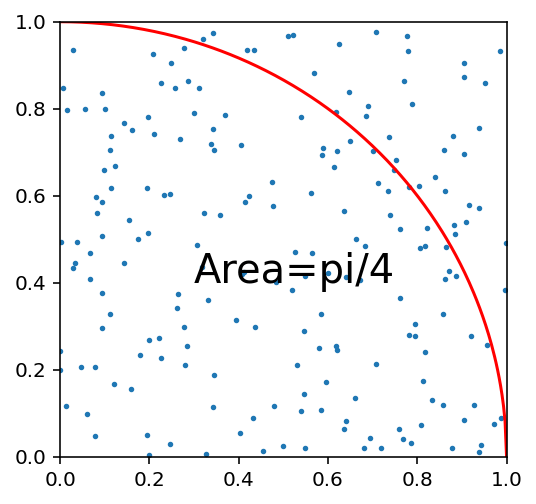

In [423]:
plt.figure(figsize=(4,4)) 
xs=np.linspace(0,1, 300) 
plt.plot(xs, (1-xs**2)**0.5, c='r')
plt.text(0.3, 0.4, "Area=pi/4", fontsize=20)
N = 200
x = np.random.rand(N)
y = np.random.rand(N) 
plt.scatter(x,y,s=3) 
plt.xlim(0,1)
plt.ylim(0,1)

In [424]:
### 랜덤 넘버로 얻는 좌표가 원 내부에 들어간 경우와 사각형 내의 경우의 비율로부터 파이를 구한다
# 특정 공간에 랜덤하게 점이 찍힐 확률은 면적 크기에 비례한다는 가정을 사용
N = 100000
x = np.random.rand(N)
y = np.random.rand(N) 
pi = ((x**2 + y**2) < 1).mean()*4 
pi

3.14692

## (연습) 실제 파이 값에 근접하기 위해서 몇개이 랜덤 넘버가 필요한가?
- 시뮬레이션으로 구한 파이값과 컴퓨터가 제공하는 파이 값의 비율을 구하시오
- 실제 파이 값: np.pi

In [425]:
# (풀이)



100 개:  2.84 0.9040000767619655
1000 개:  3.212 1.0224113544223357
10000 개:  3.1328 0.9972012114365795
100000 개:  3.14648 1.0015556906795737
1000000 개:  3.142216 1.000198417324886


# 정규 분포
- 종(bell) 모양의 확률 분포
- 자연에서 여러 번 누적된 샘플의 확률 분포는 정규(normal) 분포를 따른다는 특징이 있다
- 예: 주사위를 동시에 여러 개 던진 경우 합의 분포는 정규분포를 따른다
- 키, 몸무게 등 자연적으로 누적되는 값은 정규분포를 따르는 것이 많다

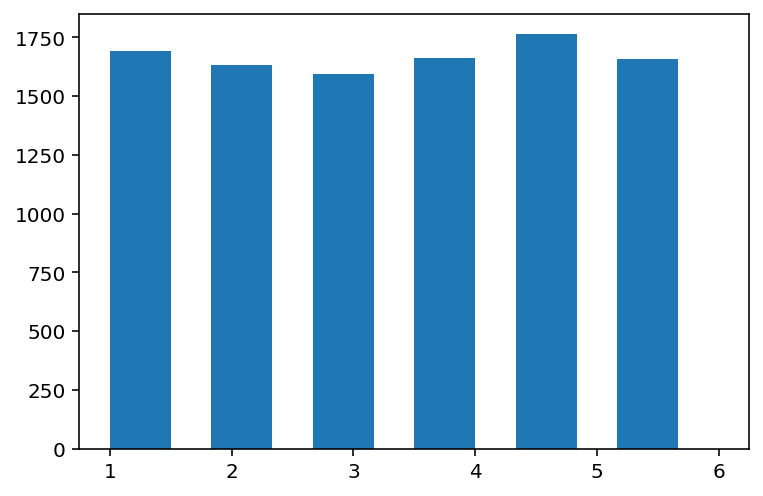

In [426]:
# 주사위 하나를 던질 때 나오는 값의 확률 분포: 균일 (uniform) 분포
N = 10000
x = np.random.randint(1,7, N) 
plt.hist(x, bins = 6, width=0.5)
plt.show()

## 누적 샘플의 확률 분포
- 주사위를 동시에 여러 개 던져서 나오는 값의 합의 분포

In [427]:
n_multiple = 2 # 주사위를 동시에 던져 합산할 주사위 수

# 총 N번 시행한 경우 빈도수를 그리는 함수 정의
def show_dices(n_multiple, N=10000):
    sum = 0
    for i in range(n_multiple):
        x = np.random.randint(1,7,N) 
        sum = sum + x
    plt.hist(sum, bins = n_multiple*5+1, width=0.7) 
    # 주사위를 1, 2, 3개 던질 때 나오는 숫자 경우의 수는 6, 11, 16, 21, ... (5*n+1)
    plt.show()

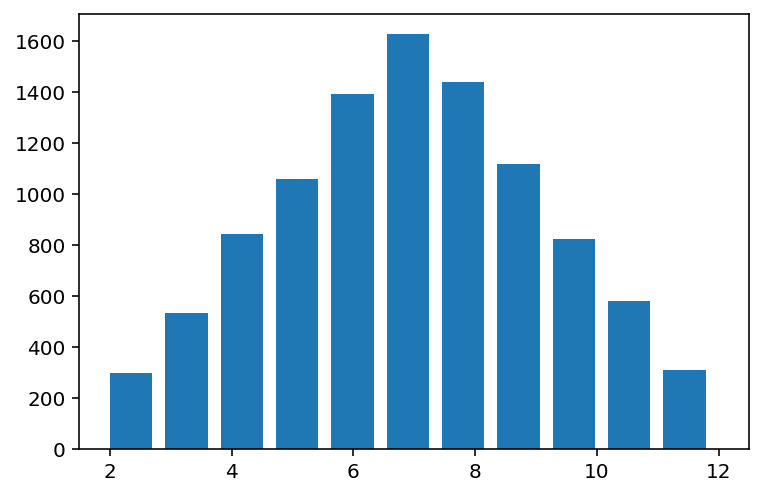

In [428]:
# 주사위를 2개 던질 때의 분포
show_dices(2)

### 주사위 두 개 합의 확률 분포
- 컨볼류션으로 구할 수 있다 (한 확률 분포는 고정하고 다른 분포 함수를 슬라이딩하면서 겹치는 면적을 구한다)
- 상수(uniform, 0차원) 함수의 적분은 1차 함수가 된다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.59.15.png?raw=1" width=500 align='left'>

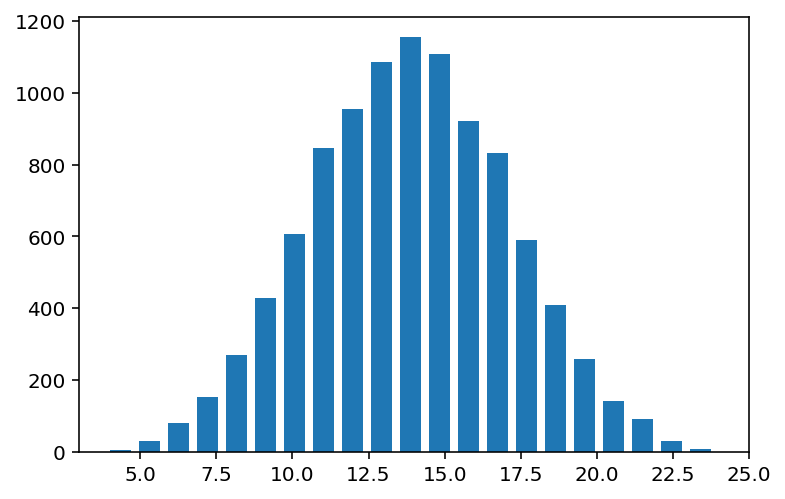

In [429]:
# 2개씩 던지는 것을 2회 더하는 경우, 즉 4개 주사위 값의 합의 분포
show_dices(4)

### 주사위 4 개의 합의 확률 분포
- 1차 함수의 적분은 2차 함수가 된다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2011.59.01.png?raw=1" width=500 align='left'>

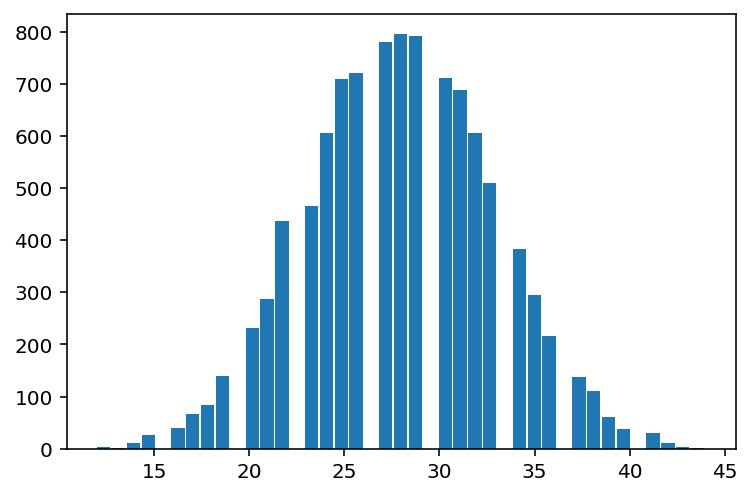

In [430]:
# 4개씩 던지는 것을 2번 더하는 경우, 즉 8개 주사위 값의 합의 분포
show_dices(8)

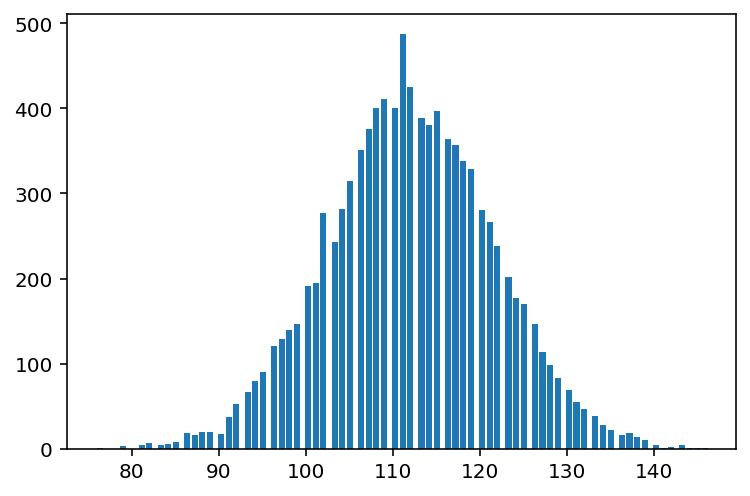

In [431]:
# 주사위 32개의 합의 확률 분포
show_dices(32)

### 이를 계속하면 정규 분포에 도달한다
- 확률 분포 2개의 컨볼류션 결과가 더 이상 바뀌지 않는 확률 분포를 정규분포라고 한다
- Central Limit Theorm

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.10.23.png?raw=1" width=500 align='left'>

- 정규분포 식 

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.13.50.png?raw=1" width=160 align='left'>

- 정규분포를 갖는 랜덤 넘버 발생, randn

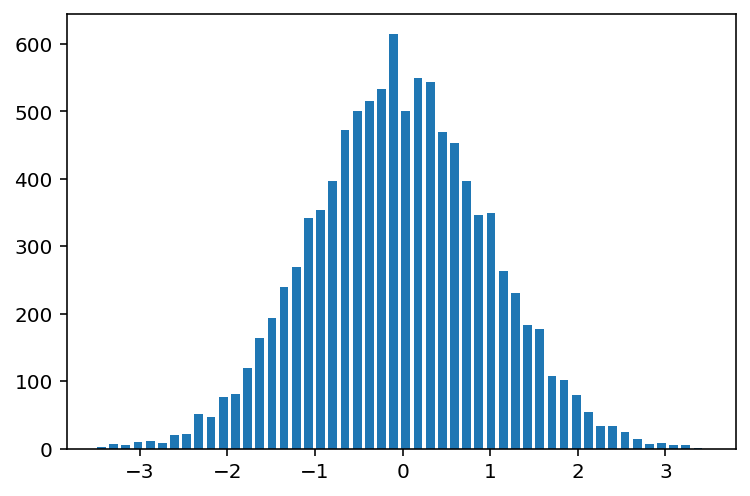

In [432]:
# 평균이 0, 표준편차가 1인 정규분포 랜덤 넘버 얻기 (randn)
x = np.random.randn(10000)
plt.hist(x, bins=50, width=0.1)
plt.show()

- 정규분포의 특징
 - 자연계에 가장 많이 발생
 - 어떤 샘플의 확률분포가 정규분포를 따른다면 이의 평균, 분산, 신뢰구간 등의 예측이 수월해진다
 - 추정 통계 분석에 유용

# 검정 통계
- 어떤 가설이 맞는지를 검정하는 것 (가설 검정: testing hypothesis)
 - 데이터를 보고, 주장하고 싶은 대립가설이 맞는지를 검정(testing)하는 것
 - 대립가설이 맞지 않다는 영(null) 가설이 얼마나 확률적으로 발생 가능한지를 보고 발생확률이 매우 낮으면 영가설이 기각하고 대립가설을 채택한다

## 독립비교 t 검정
- independence t_test
- 두 개의 샘플이 동일한 모집단에서 추출된 것인지를 검정하는 것 (정규 분포를 가정하고 두 표본의 평균의 차이를 검정)
- ttest_ind 함수를 사용하여 p-value 가 0.05 이하이면 우연히 발생했다고 보기 어렵다고 판단
 - 즉, 영가설을 기각하고 대립가설을 채택한다
 
### 정상 주사위와 비정상 주사위
- 주사위 눈금이 6이 나오지 않고 1~5만 나오는 횟수가 몇 번 이상이면 일반 주사위 던지기가 아니라고 할 것인가?

In [433]:
# 정상적인 주사위 던지기의 발생 패턴 (18회 시행)
np.random.randint(1,7,18)

array([2, 2, 4, 5, 1, 6, 1, 4, 3, 6, 5, 1, 3, 2, 3, 5, 6, 4])

In [434]:
# 비정상적인 주사위 던지기 (6일 발생하지 않는 주사위)
np.random.randint(1,6,18)

array([1, 2, 3, 1, 2, 1, 1, 2, 2, 5, 2, 2, 2, 1, 4, 1, 1, 5])

In [435]:
# 정상적인 경우: 주사위를 10000번 던진 경우의 확률 분포
# 검정할 경우: N번 던졌는데 6이 한번도 나오지 않은 경우
from scipy import stats
N=12
stats.ttest_ind(np.random.randint(1,7,10000), 
                np.random.randint(1,6,N))

Ttest_indResult(statistic=0.5443794036025861, pvalue=0.5861925418784558)

In [436]:
# 6이 연속해서 나오지 않는 횟수를 바꾸어 본다
N=60
# p-value 보기
stats.ttest_ind(np.random.randint(1,7,10000), 
                np.random.randint(1,6,N))[1].round(5)

0.10432

### 시뮬레이션 평균 구하기
- 랜덤한 시뮬레이션의 평균치를 구하기 위해서 p-value 를 200회 구하여 평균을 취한다


In [437]:
def ttest_dice_average(N):
    sum = 0
    n_simulation = 200
    for i in range(n_simulation):
        sum = sum + stats.ttest_ind(np.random.randint(1,7,10000), 
                np.random.randint(1,6,N))[1]
    return (sum/n_simulation).round(4)

In [438]:
ttest_dice_average(30)

0.18

### (연습) 주사위 던지기에서 p-value가 0.05 근처가 되는 N을 구하시오

- 주사위를 몇 번(N) 연속으로 던져도 6이 한번도 나오지 않을 때의 p-value들을 구한다.

In [549]:
# (풀이)



### 동전의 한쪽 면이 몇 번 연속 발생하면 특이한가
- 일반적으로는 0, 1이 비슷하게 발생한다
- 계속 0만 발생하는 횟수가 몇 번이면 정상이 아니라고 판단하는가? 즉, 대립 가설을 채택하는가?

In [440]:
# 정상적인 0, 1 패턴 1000번과
# N회 연속 0만 나오는 패턴이 같은 모집단의 샘플 추출이라고 볼 수 있는가?
N=10
stats.ttest_ind(np.random.randint(0,2,1000), 
                np.random.randint(0,1,N))[1].round(5)

0.00201

### (연습) 동전던지기에서 p-value가 0.05 근처가 되는 N을 구하시오
- 동전을 던져 몇 번(N) 연속 앞면만 나올 때의 p-value들을 구한다.

In [550]:
# (풀이)



### 키의 평균치가 다른지를 검정
- 두 집단의 (키)의 샘플수, 평균치, 분산 수를 바꾸어 본다
- 비교할 집단의 키의 평균치는 170으로 고정함

In [443]:
def ttest_height(N,dev,mean):
    return stats.ttest_ind(np.random.randn(N)*dev +170, 
                np.random.randn(N)*dev + mean)[1]

In [444]:
# 돌릴 때마다 다른 값이 나온다
ttest_height(30, 4, 170)

0.4140878377923295

In [445]:
# 랜덤한 시뮬레이션의 평균치를 구하기 위해서 p-value 를 200회 구하여 평균을 취한다
def ttest_h_average(height, dev, n):
    sum = 0
    n_simulation = 200
    for i in range(n_simulation):
        sum = sum + stats.ttest_ind(np.random.randn(n)*dev +170, 
                np.random.randn(n)*dev + height)[1]
    return (sum/n_simulation).round(4)

In [446]:
ttest_h_average(170, 3, 30)

0.4751

In [447]:
result = []
for height in [170, 171, 173]:
    for dev in [3,6]:
        for n in [30,300]:
            p = ttest_h_average(height, dev, n)
            result.append((height, dev, n, p))
result

[(170, 3, 30, 0.5201),
 (170, 3, 300, 0.5121),
 (170, 6, 30, 0.5334),
 (170, 6, 300, 0.4692),
 (171, 3, 30, 0.2561),
 (171, 3, 300, 0.0034),
 (171, 6, 30, 0.4482),
 (171, 6, 300, 0.1419),
 (173, 3, 30, 0.0058),
 (173, 3, 300, 0.0),
 (173, 6, 30, 0.1513),
 (173, 6, 300, 0.0)]

In [448]:
pd.DataFrame(result, columns=['height', 'dev','n' ,'p'])

,height,dev,n,p
0,170,3,30,0.5201
1,170,3,300,0.5121
2,170,6,30,0.5334
3,170,6,300,0.4692
4,171,3,30,0.2561
5,171,3,300,0.0034
6,171,6,30,0.4482
7,171,6,300,0.1419
8,173,3,30,0.0058
9,173,3,300,0.0000


In [449]:
ttest_h_average(600, 4, 171)

0.0

### (연습) 키평균이 170.5 인 그룹을 구분하기 위해서 몇개의 검증 샘플이 필요한가? (표준 편차는 3)
- 기준은 170인 샘플로 하고, 검증용 샘플의 수를 바꾸면서 p-value를 관찰한다.


In [551]:
# (풀이)



## (참고) 카이제곱 검정
- 독립성 검정 (test for independence)
- 두 개의 사건에서 얻은 샘플이 독립적인지(무관한지) 아니면 관계가 있는지를 검정하는 것
 - 예, 마케팅에서 A/B 테스트가 의미있는 결과를 냈는지를 검정
- chi2_contingency 함수를 사용하여 p-value가 0.05 이하이면 우연히 발생했다고 보기 어렵다고 본다. 즉, A/B 테스트가 효과가 있었다는 대립 가설을 채택한다

### A/B 테스트의 차이가 없는 경우
- 상품 구매 결과가 채널 A/B에 관계 없이 랜덤한 경우
- 구매:1, 비구매:0

In [537]:
# 2000회의 A/B 테스트 결과 (각각 1000회 시행)
N = 1000
ab = ["A"]*N + ["B"]*N

# 구매 결과를 랜덤하게 생성
purchase = np.random.choice([0,1], N*2)
df_ab = pd.DataFrame({"채널":ab, "구매":purchase})
df_ab

,채널,구매
0,A,0
1,A,0
2,A,1
3,A,0
4,A,1
...,...,...
1995,B,1
1996,B,0
1997,B,1
1998,B,0


In [538]:
# 교차 집계 테이블
df = pd.crosstab(df_ab['채널'], df_ab['구매'])
df

구매,0,1
채널,,
A,480,520
B,512,488


In [539]:
# 카이제곱 검정
# p-value가 0.05 이상이면, A/B 테스트는 차이가 없다는 영가설을 채택한다
_,p,_,_ = stats.chi2_contingency(df, correction=False)
p.round(5)

0.15239

### A/B 테스트의 차이가 있는 경우
- 즉, 상품 구매율이 채널 A/B에 따라 다른 경우

In [546]:
# A 채널로는 평균 48%가 구매했고, B 채널로는 평균 45% 구매했다고 가정

p1 = np.random.choice([0,1], N, p=[0.52, 0.48])
p2 = np.random.choice([0,1], N, p=[0.55, 0.45])

purchase = np.concatenate((p1,p2))
df_ab = pd.DataFrame({"채널":ab, "구매":purchase})
df_ab

,채널,구매
0,A,0
1,A,0
2,A,1
3,A,0
4,A,0
...,...,...
1995,B,1
1996,B,1
1997,B,0
1998,B,1


In [547]:
df = pd.crosstab(df_ab['채널'], df_ab['구매'])
df

구매,0,1
채널,,
A,510,490
B,575,425


In [548]:
_,p,_,_ = stats.chi2_contingency(df, correction=False)
p.round(4)

0.0035

- p-value가 0.05 이하이면 두 채널 A/B는 유의미한 차이가 있다고 본다

### (연습) 채널 A가 5:5의 구매패턴일 때, 채널 B의 구매비율이 얼마이면 유의미한 차이가 있나?
- 샘플수는 총 2000개로 고정한다
- 채널 B의 구매 비율을 바꾸어보면서 p-value를 구해본다

In [552]:
# (풀이)



# 통계분석과 머신러닝

- 통계의 목적은 데이터로부터 어떤 의미 있는 정보와 통찰력(insight)를 얻는 것이며 (확률, 평균치, 분산 등), 수학적인 근거를 제시하는 것을 목표로 한다(오차범위, 신뢰도 등)
- 통계학에서는 이론적인 근거를 설명하는 것을 중요시 한다. 가설, 확률, 신뢰구간, 오차범위 등을 다룬다

- 머신러닝은 이론적인 근거 제시보다는 데이터로부터 예측, 분류 등을 수행하는 모델(소프트웨어)을 만드는 것이며, 예측 성능의 향상을 목표로 한다(정확도, 리콜 등).

- 분석할 데이터의 량이 적으면 통계적 분석에 의존하여 '설명'을 해야 하나, 데이터가 충분히 많으면 머신러닝 모델을 만들어 실전에서 동작하는 모델을 만드는 것이 더 유용하다

# 정답

## (연습) 실제 파이 값에 근접하기 위해서 몇개이 랜덤 넘버가 필요한가?
- 시뮬레이션으로 구한 파이값과 컴퓨터가 제공하는 파이 값의 비율을 구하시오
- 실제 파이 값: np.pi

In [425]:
for N in [100,1000,10000,100000,1000000]:
    x = np.random.rand(N)
    y = np.random.rand(N) 
    p = ((x**2 + y**2) < 1).mean()*4.0
    print(N,'개: ', p, p/np.pi)


100 개:  2.84 0.9040000767619655
1000 개:  3.212 1.0224113544223357
10000 개:  3.1328 0.9972012114365795
100000 개:  3.14648 1.0015556906795737
1000000 개:  3.142216 1.000198417324886


## (연습) 주사위 던지기에서 p-value가 0.05 근처가 되는 N을 구하시오

- 주사위를 몇 번(N) 연속으로 던져도 6이 한번도 나오지 않을 때의 p-value들을 구한다.

In [ ]:
def ttest_dice_average(N):
    sum = 0
    n_simulation = 200
    for i in range(n_simulation):
        sum = sum + stats.ttest_ind(np.random.randint(1,7,10000), 
                np.random.randint(1,6,N))[1]
    return (sum/n_simulation).round(4)

In [439]:
for N in range(10, 101, 10):
    print(N, ttest_dice_average(N))

10 0.3798
20 0.2752
30 0.1944
40 0.1474
50 0.1066
60 0.0718
70 0.069
80 0.0367
90 0.0316
100 0.0296


## (연습) 동전던지기에서 p-value가 0.05 근처가 되는 N을 구하시오
- 동전을 던져 몇 번(N) 연속 앞면만 나올 때의 p-value들을 구한다.

In [441]:
def ttest_coin_average(N):
    sum = 0
    n_simulation = 200
    for i in range(n_simulation):
        sum = sum + stats.ttest_ind(np.random.randint(0,2,1000), 
                np.random.randint(0,1,N))[1]
    return (sum/n_simulation).round(4)

In [442]:
for N in range(2,20):
    print(N, ttest_coin_average(N))

2 0.1584
3 0.0845
4 0.0454
5 0.0258
6 0.0146
7 0.0082
8 0.0048
9 0.0029
10 0.0017
11 0.001
12 0.0006
13 0.0003
14 0.0002
15 0.0001
16 0.0001
17 0.0
18 0.0
19 0.0


## (연습) 키평균이 170.5 인 그룹을 구분하기 위해서 몇개의 검증 샘플이 필요한가? (표준 편차는 3)
- 기준은 170인 샘플로 하고, 검증용 샘플의 수를 바꾸면서 p-value를 관찰한다.


In [ ]:
def ttest_h_average(height, dev, n):
    sum = 0
    n_simulation = 200
    for i in range(n_simulation):
        sum = sum + stats.ttest_ind(np.random.randn(n)*dev +170, 
                np.random.randn(n)*dev + height)[1]
    return (sum/n_simulation).round(4)

In [452]:
dev = 3
height = 170.5
for N in range(100,1000,100):
    print(N, ttest_h_average(height, dev, N))

100 0.3111
200 0.2172
300 0.1599
400 0.1032
500 0.0581
600 0.0525
700 0.032
800 0.0229
900 0.0169


## (연습) 채널 A가 5:5의 구매패턴일 때, 채널 B의 구매비율이 얼마이면 유의미한 차이가 있나?
- 샘플수는 총 2000개로 고정한다
- 채널 B의 구매 비율을 바꾸어보면서 p-value를 구해본다

In [536]:
N = 1000
ab = ["A"]*N + ["B"]*N
p1 = np.random.choice([0,1], N, p=[0.5, 0.5])

result = []

for ratio in np.arange(0.3 ,0.7, 0.02):
    p2 = np.random.choice([0,1], N, p=[1-ratio, ratio])
    purchase = np.concatenate((p1,p2))
    df_ab = pd.DataFrame({"채널":ab, "구매":purchase})
    df = pd.crosstab(df_ab['채널'], df_ab['구매'])
    _,p,_,_ = stats.chi2_contingency(df, correction=False)
    result.append((ratio, p.round(4)))

Text(0, 0.5, 'p-value')

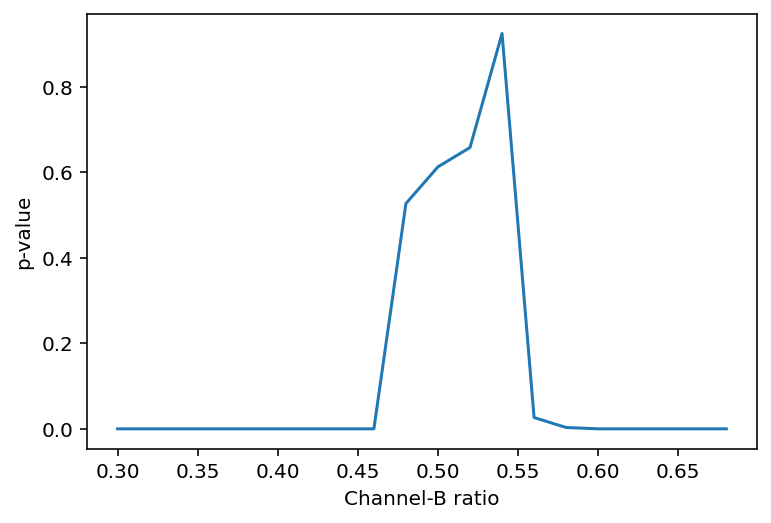

In [535]:
res = np.array(result)
plt.plot(res[:,0], res[:,1])
plt.xlabel('Channel-B ratio')
plt.ylabel('p-value')